In [3]:
%load_ext autoreload
%autoreload 2

import preprocess 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
preprocess.main('CC*.pkl','BIOS.pkl')

Loading 'CC-MAIN-2018-34-bios.pkl'
Loading 'CC-MAIN-2017-43-bios.pkl'
Loading 'CC-MAIN-2014-41-bios.pkl'
Loading 'CC-MAIN-2018-13-bios.pkl'
Loading 'CC-MAIN-2013-20-bios.pkl'
Loading 'CC-MAIN-2016-44-bios.pkl'
Loading 'CC-MAIN-2018-05-bios.pkl'
82,701/119,125 'different' name+titles (69.4%)
Processing bios...
Wrote 82,701 bios to 'BIOS.pkl'


In [5]:
!ls

aiethics		      CC-MAIN-2016-44-bios.pkl	CC-MAIN-2018-34-log.txt
aiethics.yml		      CC-MAIN-2016-44-log.txt	download_bios.py
azure-pipelines.yml	      CC-MAIN-2017-43-bios.pkl	freq_titles.json
Bias_in_Bios_implement.ipynb  CC-MAIN-2017-43-log.txt	LICENSE
BIOS.pkl		      CC-MAIN-2018-05-bios.pkl	preprocess.py
CC-MAIN-2013-20-bios.pkl      CC-MAIN-2018-05-log.txt	__pycache__
CC-MAIN-2013-20-log.txt       CC-MAIN-2018-13-bios.pkl	README.md
CC-MAIN-2014-41-bios.pkl      CC-MAIN-2018-13-log.txt	recreate.sh
CC-MAIN-2014-41-log.txt       CC-MAIN-2018-34-bios.pkl	Untitled.ipynb


In [6]:
import pickle
all_bios = pickle.load( open( "BIOS.pkl", "rb" ) )

## Dictionary Details 

1. r["title"] tells you the noramlized title
2. r["gender"] tells you the gender (binary for simplicity, determined from the pronouns)3. 
3. r["start_pos"] indicates the length of the first sentence.
4. r["raw"] has the entire bio
5. The field r["bio"] contains a scrubbed version of the bio (with the person's name and obvious gender words (like she/he removed)


## Problem Statement 

So the classification task is to predict r["title"] from r["raw"][r["start_pos"]:]


#### Example Dictionary Element

In [31]:
test_bio = all_bios[0]
test_bio['bio']

'_ has the UK’s #1 rated health and fitness podcast on iTunes ‘_ _ Radio’. _ run’s The BTN Academy, an online nutrition education company. _ also owns Awesome Supplements, a brand offering clarity in the confusing world of supplements. _ is a sought-after speaker selling out _ own public seminars on nutrition, health and personal development alongside speaking at the major UK fitness events. Connect with _ over on Facebook, Twitter, YouTube, or Instagram. For everything else visit: http://www.bencoomber. com'

In [8]:
test_bio['raw']

'Ben Coomber is a nutritionist (BSc, CISSN), Coach, speaker and writer. Ben has the UK’s #1 rated health and fitness podcast on iTunes ‘Ben Coomber Radio’. Ben run’s The BTN Academy, an online nutrition education company. Ben also owns Awesome Supplements, a brand offering clarity in the confusing world of supplements. Ben is a sought-after speaker selling out his own public seminars on nutrition, health and personal development alongside speaking at the major UK fitness events. Connect with Ben over on Facebook, Twitter, YouTube, or Instagram. For everything else visit: http://www.bencoomber. com'

### Distribution of occupation

In [17]:
occupation_dict={}
for bio in all_bios:
    occupation=bio['title']
    try:
        occupation_dict[occupation] = 1
    except KeyError:
        occupation_dict[occupation] += 1


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


keys = x.keys()
vals = x.values()

plt.bar(keys, np.divide(list(vals), sum(vals)), label="Real distribution")

plt.ylim(0,1)
plt.ylabel ('Percentage')
plt.xlabel ('Significant number')
plt.xticks(list(keys))
plt.legend (bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=0.)

plt.show()

In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column

import pandas as pd

train_data=pd.read_csv('Data/Train.csv')
val_data =pd.read_csv('Data/Val.csv')
test_data =pd.read_csv('Data/Test.csv')

total_data = pd.concat([train_data,test_data,val_data],axis=0)

# #stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

# # #Set general plot properties
# sns.set_style("white")
# sns.set_context({"figure.figsize": (24, 10)})

# # #Plot 1 - background - "total" (top) series
# sns.barplot(x = stacked_bar_data.title, y = stacked_bar_data., color = "red")

# # #Plot 2 - overlay - "bottom" series
# # bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


# # topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
# # bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
# # l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
# # l.draw_frame(False)

# # #Optional code - Make plot look nicer
# # sns.despine(left=True)
# # bottom_plot.set_ylabel("Y-axis label")
# # bottom_plot.set_xlabel("X-axis label")

# # #Set fonts to consistent 16pt size
# # for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
# #              bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
# #     item.set_fontsize(16)


In [20]:
df=total_data.groupby(['title','gender'])['path'].count()


In [28]:
total_data['title'].unique()

array(['photographer', 'teacher', 'professor', 'physician', 'nurse',
       'pastor', 'attorney', 'software_engineer', 'poet', 'model',
       'psychologist', 'filmmaker', 'architect', 'composer',
       'chiropractor', 'journalist', 'dentist', 'painter', 'rapper',
       'yoga_teacher', 'surgeon', 'dietitian', 'accountant', 'comedian',
       'paralegal', 'dj', 'interior_designer', 'personal_trainer', nan,
       'http://mnbheights.com/forums/topic/brainwashed-columbus-day/'],
      dtype=object)

In [34]:
df_to_plot=pd.DataFrame(columns=['title','M','F'])
list1=[]

for title in list(total_data['title'].unique()):
    try:
        list1.append((title, df[title,'M'],df[title,'F']))
    except:
        pass
df_to_plot=pd.DataFrame(list1,columns=['title','M','F'])



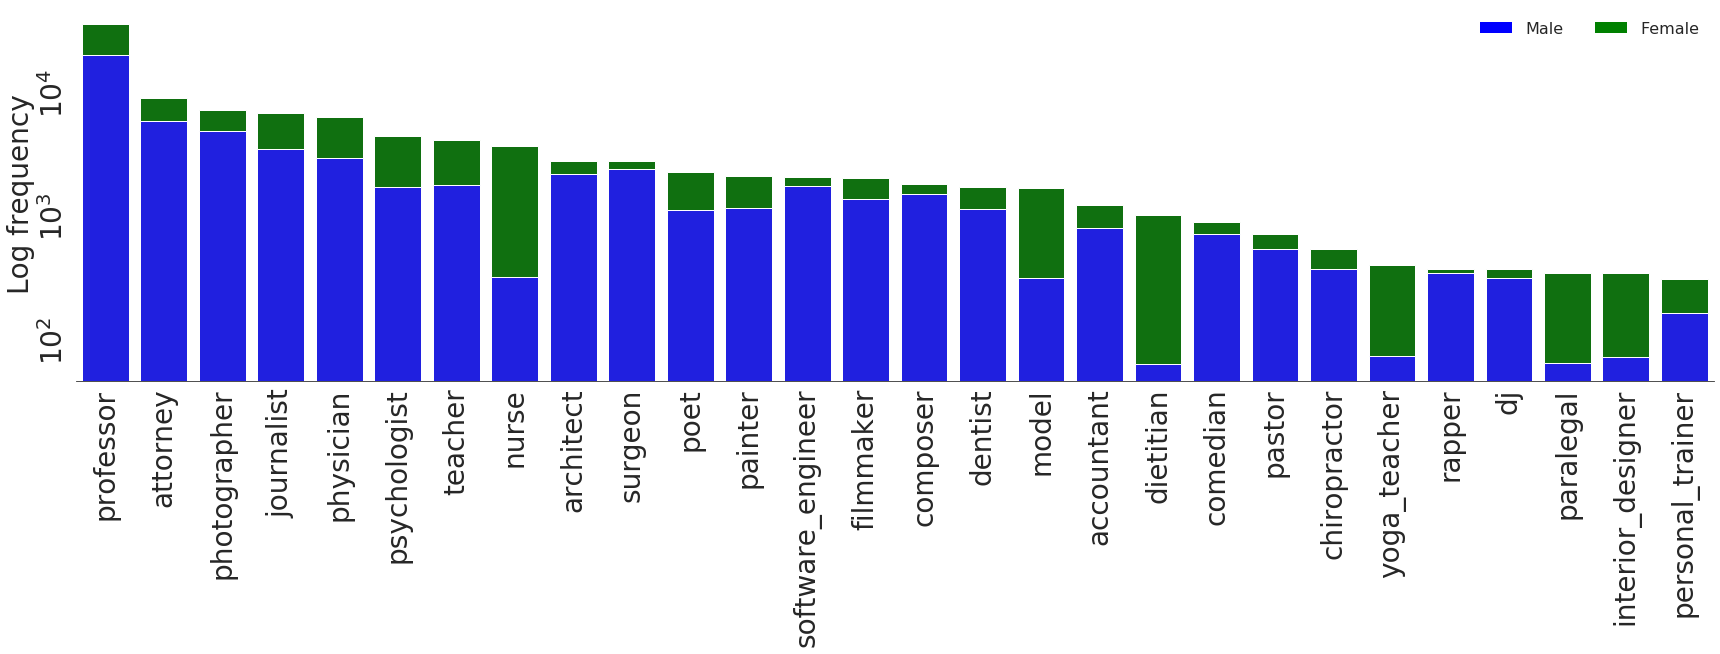

In [60]:
#total_data = pd.concat([train_data,test_data,val_data],axis=0)

df_to_plot["total"] = df_to_plot['M'] + df_to_plot['F']

df_to_plot=df_to_plot.sort_values(['total'],ascending=False)
# #Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

# #Plot 1 - background - "total" (top) series
sns.barplot(x = df_to_plot.title, y = df_to_plot.total, color = "green")

# #Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = df_to_plot.title, y = df_to_plot['M'], color = "blue")


topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='blue',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Male', 'Female'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Log frequency")
plt.yscale('log')
#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(28)
    item.set_rotation('vertical')
#bottom_plot.set_xlabel("Occupation")
plt.tight_layout()
bottom_plot.set_xlabel('')
plt.savefig('data_distribution.png')

### Model 1 : Bag of words


In [27]:
word_dict={}
for bio in all_bios:
    index_to_start=bio['start_pos']
    tokens=bio['raw'][index_to_start:].split()
    for tok in tokens:
        tok = tok.strip().lower()
        try:
            word_dict[tok] += 1
        except:
            word_dict[tok] = 1
        



In [28]:
len(list(word_dict))

239227

In [15]:
import nltk

In [16]:
import pandas as pd

In [22]:
from scipy.sparse import vstack, csr_matrix, save_npz, load_npz

In [21]:
!pip install scipy

  Using cached scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl (26.1 MB)
ERROR: keras 2.3.1 requires h5py, which is not installed.
ERROR: keras 2.3.1 requires keras-applications>=1.0.6, which is not installed.
ERROR: keras 2.3.1 requires keras-preprocessing>=1.0.5, which is not installed.
ERROR: keras 2.3.1 requires pyyaml, which is not installed.


In [35]:
df = pd.DataFrame(all_bios, columns =list(all_bios[0].keys()))

In [38]:
from sklearn.model_selection import train_test_split


In [43]:
df_train,df_test_val=train_test_split(df, test_size=0.35, random_state=42,stratify=df['title'])
df_test,df_val=train_test_split(df_test_val, test_size=0.28, random_state=42,stratify=df_test_val['title'])

In [46]:
df_train.to_csv('Train.csv',index=False)
df_test.to_csv('Test.csv',index=False)
df_val.to_csv('Val.csv',index=False)

In [29]:
import heapq
most_freq = heapq.nlargest(50000, word_dict, key=word_dict.get)


In [30]:
dataset = []


for bio in all_bios:
    index_to_start=bio['start_pos']
    tokens=bio['raw'][index_to_start:].split()
    for tok in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
        sentence_vectors.append(sent_vec)

for sentence in corpus:
    sentence_tokens = nltk.word_tokenize(sentence)
    sent_vec = []
    for token in most_freq:
        if token in sentence_tokens:
            sent_vec.append(1)
        else:
            sent_vec.append(0)
    sentence_vectors.append(sent_vec)


50000